<div>
<img src="figures/svtLogo.png"/>
</div>

<center><h1>Mathematical Optimization for Engineers</h1></center>
<center><h2>Lab 5 - KKT Conditions of Optimality</h2></center>

### KKT conditions for equality-constrained problems

We consider the following optimization problem 

$$\begin{aligned}
\displaystyle \min_{x_1,x_2} \;\; &x_1+x_2 \\
\mbox{s.t. } \; &x_2=x_1 ^2-2.
\end{aligned}$$

<u>Task 1</u>: Reformulate the optimization problem with the general nomenclature
of the Lecture in terms of $f$ and $c_{i}$.

$$\begin{aligned}
\displaystyle \min_{x_1,x_2}f(x) =\;\; &x_1+x_2 \\
\mbox{s.t. } \; &x_2-x_1 ^2+2. = 0.
\end{aligned}$$

<u>Task 2</u>: What are the gradients of the objective function and the equality
constraint function?

$$
\Delta f(\boldsymbol{x}) = [1, 1] \\
\Delta c(\boldsymbol{x}) = [-2 x_1, 1]
$$

<u>Task 3</u>: Sketch the feasible region of the optimization problem for
$x_1 \in [-2,2]$ and $x_2 \in [-2,3]$; add the contour lines of the
objective function; add the direction of the gradients of the
objective function and the equality constraint.

(-2.0, 3.0)

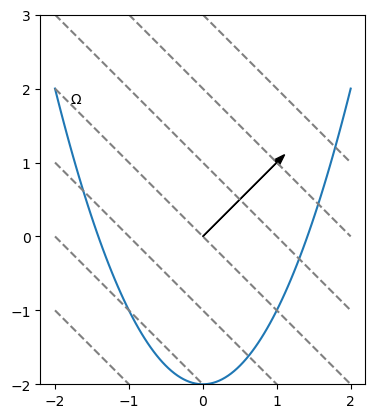

In [32]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

x_1 = np.linspace(-2,2,100)

# the function, which is y = x^2 here
x_2 = x_1**2-2

objectives = [i-x_1 for i in range(-3, 4)]


fig = plt.figure()
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(x_1, x_2)
plt.text(-1.8, 1.8, r'$\Omega$')

for obj in objectives:
    plt.plot(x_1, obj, linestyle="--", color="gray")


plt.arrow(0, 0, 1, 1, head_width = 0.1, width = 0.005, color="black", ec ='black')
    
plt.ylim(-2, 3)


<u>Task 4</u>: Set up the Langrangian function for this optimization problem

$$\begin{aligned}
\boldsymbol{L}(\boldsymbol{x},\lambda) & = f(\boldsymbol{x}) + \lambda (x_2-x_1 ^2+2.) \\
& = x_1 + x_2 + \lambda (x_2-x_1 ^2+2.)
\end{aligned}$$

<u>Task 5</u>: Write down the KKT-conditions with respect to this optimization
problem

$$
\begin{bmatrix}1 \\ 1\end{bmatrix} + \lambda^* \begin{bmatrix}-2 x_1^* \\ 1\end{bmatrix} = \begin{bmatrix}0 \\ 0 \end{bmatrix} \\
x_2^*-x_1^{*^2}+2. = 0. \\
\lambda^* \geq 0 \\
\lambda^* (x_2^*-x_1^{*^2}+2.) = 0 \\
$$

<u>Task 6</u>: Solve manually the KKT-conditions for $x_1$, $x_2$ and the Lagrange
multiplier.

$$
\lambda^* = -1 \\
x_1^* = -\frac{1}{2} \\
x_2^* = -\frac{7}{4} \\
$$

<u>Task 7</u>: Solve numerically (with `fsolve` from scipy.optimize) the KKT-conditions for
$x_1$, $x_2$ and the Lagrange multiplier.

In [35]:
from scipy import optimize as opt
import numpy as np

def kkt_conditions(y):
    conditions = np.zeros(len(y))
    x1 = y[0]
    x2 = y[1]
    l = y[2]
    
    conditions[0] = 1 - 2*l*x1
    conditions[1] = 1 + l
    conditions[2] = x2 - x1**2 + 2
    
    return conditions
    

y0 = np.array([-1.0, -1.0, -1.0]) # initial guess 

res = opt.fsolve(kkt_conditions, y0, full_output=False)

print ("x1 = {:.2f} \nx2 = {:.2f} \nl = {:.2f}".format(res[0],res[1],res[2]))

x1 = -0.50 
x2 = -1.75 
l = -1.00


### KKT conditions for inequality-constrained problems

We consider the following optimization problem 

$$\begin{aligned}
\displaystyle \min_{x_1,x_2} \quad &x_1+x_2 \\
\mbox{s.t. } \; &x_1 \geq -2 \\
&x_2  \geq -2
\end{aligned}$$

<u>Task 1</u>: Reformulate the optimization problem with the general nomenclature
of the Lecture in terms of $f$ and $c_{i}$.

$$\begin{aligned}
\min_{\mathbf {x} \in \mathbb R^n} \quad &f(\mathbf {x}) \\
\mbox{s.t. } \quad &\mathbf {c_i}(\mathbf {x}) \leq \mathbf {0} \quad \forall i \in I \\
&\mathbf {c_i}(\mathbf {x}) = \mathbf {0}  \quad \forall i \in E
\end{aligned}$$

Here, we have $\mathbf {x} = \left[ \begin{array}{{c}}
                                        x_1 \\
                                        x_2
                                    \end{array} \right]$ and $n=2$;
                                    
$f(x_1,x_2) = x_1 + x_2$, $c_1(x_1)= -2 - x_1$ and $c_2(x_2) = -2 - x_2 $ are scalar functions. There are no equality constraints in this example.

<u>Task 2</u>: -   What are the gradients of the objective function and the inequality constraints?

$\mathbf \nabla f(x_1,x_2) = \left[ \begin{array}{c}
                                            1 \\
                                            1
                            \end{array}\right]$ and
$\mathbf \nabla c_1(x_1,x_2) = \left[ \begin{array}{c}
                                            -1 \\
                                            0
                                \end{array}\right]$
$\mathbf \nabla c_1(x_1,x_2) = \left[ \begin{array}{c}
                                            0 \\
                                            -1
                                \end{array}\right]$

<u>Task 3</u>: -   Sketch the feasible region of the optimization problem for
$x_1 \in [-3,1]$ and $x_2 \in [-3,1]$; add the contour lines of the
objective function; add the direction of the gradients of the
objective function and the inequality constraints.

(-3.0, 1.0)

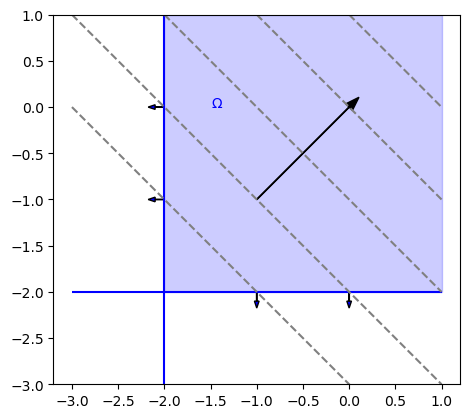

In [61]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

%matplotlib inline

x_1 = np.linspace(-3,1,100)

objectives = [i-x_1 for i in range(-3, 4)]


fig, ax = plt.subplots()
plt.gca().set_aspect('equal', adjustable='box')
plt.vlines([-2], -3, 1, color='blue')
plt.hlines([-2], -3, 1, color='blue')
ax.add_patch(Rectangle((-2,-2), 3, 3, color='blue', alpha=0.2, fill=True))
plt.text(-1.5, 0, r'$\Omega$', color='blue')

for obj in objectives:
    plt.plot(x_1, obj, linestyle="--", color="gray")


plt.arrow(-1, -1, 1, 1, head_width = 0.1, width = 0.005, color="black", ec ='black')

plt.arrow(-2, 0, -0.1, 0, head_width = 0.05, width = 0.005, color="blue", ec ='black')
plt.arrow(-2, -1, -0.1, 0, head_width = 0.05, width = 0.005, color="blue", ec ='black')
plt.arrow(0, -2, 0, -0.1, head_width = 0.05, width = 0.005, color="blue", ec ='black')
plt.arrow(-1, -2, 0, -0.1, head_width = 0.05, width = 0.005, color="blue", ec ='black')    
    
plt.ylim(-3, 1)

<u>Task 4</u>: Set up the Langrangian function for this optimization problem

$$
\mathbf{L}(x_1, x_2, \lambda_1, \lambda_2) = x_1 + x_2 + \lambda_1 (-2 - x_1) + \lambda_2 (-2 - x_2)
$$

<u>Task 5</u>: Write down the KKT-conditions with respect to this optimization
problem

$$
\begin{bmatrix}1 \\ 1\end{bmatrix} + \lambda_1 \begin{bmatrix}-1 \\ 0\end{bmatrix} + \lambda_2 \begin{bmatrix}0 \\ -1\end{bmatrix} = 0 \\
-2 - x_1 \leq 0 \\ 
-2 - x_2 \leq 0 \\
\lambda_1 \geq 0 \\
\lambda_2 \geq 0 \\
\lambda_1 (-2 - x_1) = 0 \\
\lambda_2 (-2 - x_2) = 0 \\
$$

<u>Task 6</u>: Solve manually the KKT-conditions for $x_1$, $x_2$ and the Lagrange
multiplier.

$$
\begin{aligned}
\lambda_1 &= 1 \\
\lambda_2 &= 1 \\
x_1 &= -2 \\
x_2 &= -2 \\
\end{aligned}
$$

### A degenerate case

We consider the following optimization problem 

$$\begin{aligned}
\displaystyle \min_{x_1,x_2} \quad &x_1 \\
\mbox{s.t. } \;  &x_{2} \leq 0 \\
&x_{1}^{2} - x_{2} \leq 0\,.
\end{aligned}$$

<u>Task 1</u>: Write down the KKT-conditions with respect to this optimization
problem

$$
\begin{aligned}
\begin{bmatrix}1 \\ 0\end{bmatrix} + \lambda_1 \begin{bmatrix}0 \\ 1\end{bmatrix} + \lambda_2 \begin{bmatrix}2 x_1 \\ -1 \end{bmatrix} & = 0\\
x_{2} &\leq 0 \\
x_{1}^{2} - x_{2} &\leq 0 \\
\lambda_1 & \geq 0 \\
\lambda_2 & \geq 0 \\
\lambda_1 ( x_2) &= 0 \\
\lambda_2 (x_1^2-x_2) &= 0 \\
\end{aligned}
$$

<u>Task 2</u>: Solve manually the KKT-conditions for $x_1$, $x_2$ and the Lagrange
multipliers.

$$
\begin{matrix}
    1 + \lambda_2 2 x_1 = 0 \\
    \lambda_1 - \lambda_2 = 0 \\
    \lambda_1x_2 = 0 \\
    \lambda_2x_1^2 - \lambda_2 x_2 = 0 \\
\end{matrix}
\Leftrightarrow 
\begin{matrix}
    \lambda_2 x_1 = -\frac{1}{2} \\
    \lambda_1 = \lambda_2 \\
    \lambda_2x_2 = 0 \\
    \lambda_2x_1^2 - \lambda_2 x_2 = 0
\end{matrix}
\Leftrightarrow 
\begin{matrix}
    \lambda_2 = -\frac{1}{2x_1} \\
    \lambda_1 = \lambda_2 \\
    \lambda_2x_2 = 0 \\
    x_1^2 = x_2
\end{matrix}
\Leftrightarrow 
-\frac{x_1^2}{2x_1}  = 0
\Leftrightarrow 
x_1 = -\frac{1}{2}
$$

$$
\begin{aligned}
x_1 &= 0 \\
\end{aligned}
$$

<u>Task 3</u>: Sketch the feasible region of the optimization problem; add the contour lines of the
objective function; add the direction of the gradients of the objective function and the constraints. Where is the optimum?

(-1.0, 2.0)

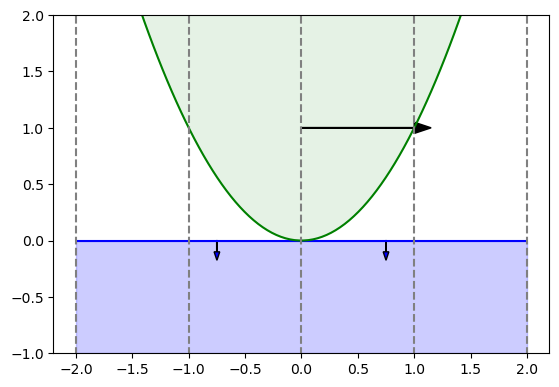

In [80]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

%matplotlib inline

x1 = np.linspace(-2,2,100)
x2 = x1**2

objectives = [i for i in range(-2, 3)]

fig, ax = plt.subplots()
plt.gca().set_aspect('equal', adjustable='box')

# c1
plt.hlines([0], -2, 2, color='blue')
ax.add_patch(Rectangle((-2,-1), 4, 1, color='blue', alpha=0.2, fill=True))

# c2
plt.plot(x1, x2, color='green')
ax.fill_between(x1, x2, 2, color='green', alpha=.1)


for obj in objectives:
    plt.vlines(obj, -3, 3, linestyle="--", color="gray")


plt.arrow(0, 1, 1, 0, head_width = 0.1, width = 0.005, color="black", ec ='black')


plt.arrow(-0.75, 0, 0, -0.1, head_width = 0.05, width = 0.005, color="blue", ec ='black')
plt.arrow(0.75, 0, 0, -0.1, head_width = 0.05, width = 0.005, color="blue", ec ='black')    
    
plt.ylim(-1, 2)